In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [40]:
df = pd.read_csv('csv/ldpr_users.csv')

df.head()

,id,first_name,last_name,sex,birthday_date
0,510,Анатолий,Карпенко,2,0
1,762,Константин,Белоус,2,0
2,2703,Герцог,Тельманский,2,0
3,3386,Антон,Тузяк,2,18.2.1988
4,3690,Денис,Шурупцев,2,17.12


In [41]:
# Подготовка данных для круговой диаграммы по полу
df = df.loc[df.sex != 0].reset_index()
sex_counts = df['sex'].value_counts()
sex_labels = ['Мужчины' if x == 2 else 'Женщины' for x in sex_counts.index]

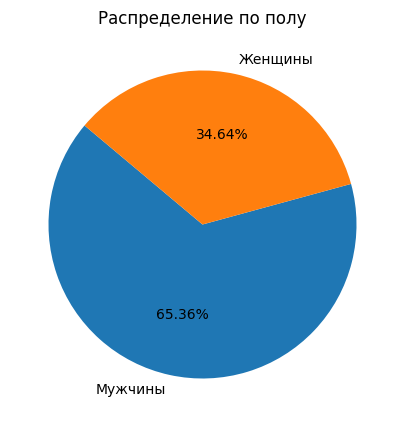

In [57]:
# Создание круговой диаграммы по полу
plt.figure(figsize=(10, 5))
plt.pie(sex_counts, labels=sex_labels, autopct='%1.2f%%', startangle=140)
plt.title('Распределение по полу')

# Показать круговую диаграмму
plt.show()

In [51]:
df1 = df.loc[df.birthday_date != '0'].reset_index()
df1 = df1.loc[df1['birthday_date'].str.match(r'\d{1,2}\.\d{1,2}\.\d{4}') == True]
df1

,level_0,index,id,first_name,last_name,sex,birthday_date
0,3,3,3386,Антон,Тузяк,2,18.2.1988
2,5,5,5442,Владимир,Ворожбянский,2,18.1.1987
3,6,6,6302,Sergey,Chulkov,2,4.3.1987
4,8,8,8188,Антон,Минаков,2,14.11.1986
6,10,10,12005,Александр,Божко,2,16.9.1986
...,...,...,...,...,...,...,...
91940,115792,115832,856001852,Владимир,Жириновский,2,25.4.1949
91941,115794,115834,856467296,Роман,Вагнер,2,6.11.1991
91942,115795,115835,857279694,アリス,メルニコワ,1,12.11.2004
91943,115796,115836,857587725,Марина,Яковлева,1,31.8.1983


In [52]:
# Подготовка данных для столбчатой диаграммы по годам рождения
# Извлечение года из даты рождения
df1['year'] = df1['birthday_date'].apply(lambda x: str(x).split('.')[-1])
df1['year'] = df1['year'].apply(lambda x: x if len(x) == 4 else None)
year_counts = df1['year'].value_counts().sort_index()

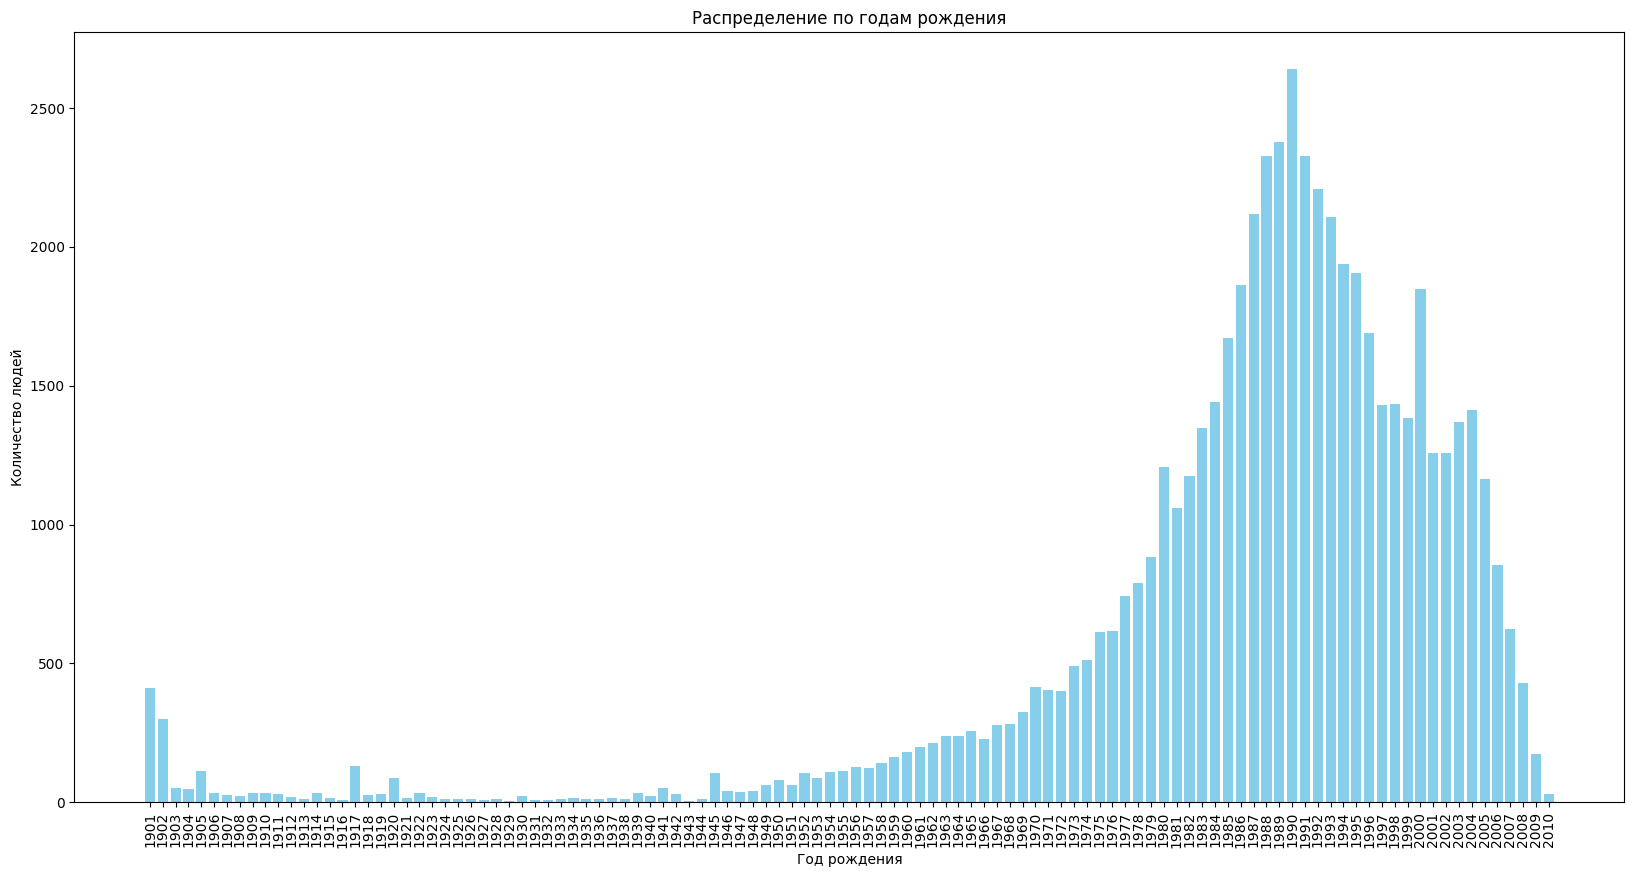

In [53]:
# Создание столбчатой диаграммы по годам рождения
plt.figure(figsize=(20, 10))
plt.bar(year_counts.index, year_counts.values, color='skyblue')
plt.xlabel('Год рождения')
plt.ylabel('Количество людей')
plt.title('Распределение по годам рождения')
plt.xticks(rotation=90)  # Поворот меток на оси X для лучшей читаемости

# Показать столбчатую диаграмму
plt.show()

In [54]:
from datetime import datetime, timedelta

# Функция для преобразования даты рождения в возраст
def calculate_age(born):
    born = datetime.strptime(born, "%d.%m.%Y").date()
    today = datetime.today().date()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [56]:
df1['age'] = df1['birthday_date'].apply(calculate_age)
df1

,level_0,index,id,first_name,last_name,sex,birthday_date,year,age
0,3,3,3386,Антон,Тузяк,2,18.2.1988,1988,36
2,5,5,5442,Владимир,Ворожбянский,2,18.1.1987,1987,37
3,6,6,6302,Sergey,Chulkov,2,4.3.1987,1987,37
4,8,8,8188,Антон,Минаков,2,14.11.1986,1986,37
6,10,10,12005,Александр,Божко,2,16.9.1986,1986,37
...,...,...,...,...,...,...,...,...,...
91940,115792,115832,856001852,Владимир,Жириновский,2,25.4.1949,1949,74
91941,115794,115834,856467296,Роман,Вагнер,2,6.11.1991,1991,32
91942,115795,115835,857279694,アリス,メルニコワ,1,12.11.2004,2004,19
91943,115796,115836,857587725,Марина,Яковлева,1,31.8.1983,1983,40


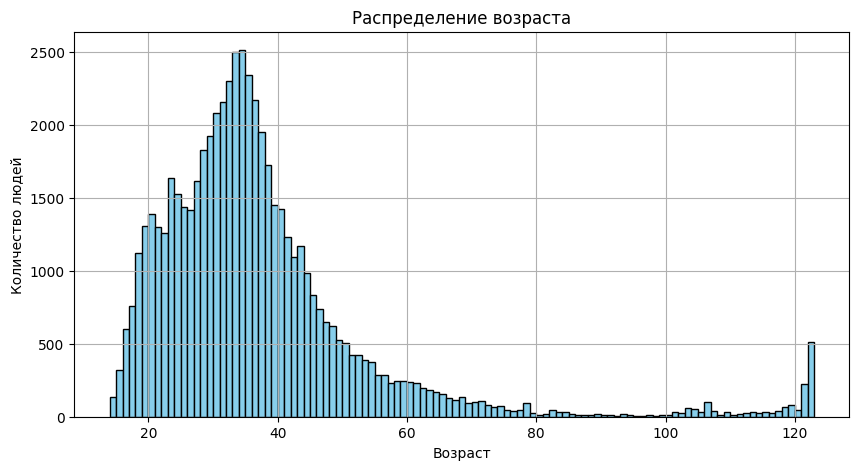

In [58]:
# Визуализация распределения возраста
plt.figure(figsize=(10, 5))
df1['age'].hist(bins=range(min(df1['age']), max(df1['age']) + 1, 1), color='skyblue', edgecolor='black')
plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Количество людей')

# Показать гистограмму
plt.show()